# Function diagnostics

In [2]:
#import stuff
from placerg.funcs import *
from placerg.funcsrg import *
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.optimize import curve_fit
import math
import time
import placerg._dice6 as _dice6

## generating various pdfs

requested mean: 0.0
calculated mean: 0.00015444116673869775
requested stdev: 1.0
calculated stdev: 1.0003194376331561
integrate distribution: 1.0000000000000042
expected maximum: 0.3989422804014327
caclulated maximum: 0.39906526507031964


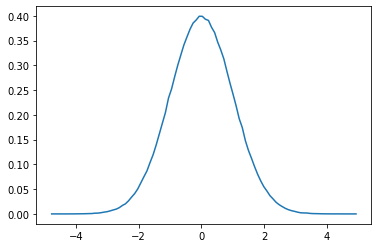

In [3]:
# test that my draw pdf function is working properly:
# note that here a gaussian pdf should have height 1/(sqrt(2*pi)*sigma)
n = 1000000 # number of samples

mean = 0. # mean

stdev = 1. # desired standard deviation 

dist = np.random.normal(mean, stdev, n)

res = drawpdf(dist,100)

print('requested mean: '+str(mean))
print('calculated mean: '+str(np.mean(dist)))
print('requested stdev: '+str(stdev))
print('calculated stdev: '+str(np.std(dist)))
print('integrate distribution: ' +str(np.sum(res[1])*(res[0][1]-res[0][0])))
print('expected maximum: ' + str(1/(np.sqrt(2*np.pi)*stdev)))
print('caclulated maximum: ' + str(np.max(res[1])))
plt.plot(res[0], res[1])

requested mean: 100
calculated mean: 99.99927769001928
requested stdev: 5
calculated stdev: 4.993624167463107
integrate distribution: 0.9999999999999812


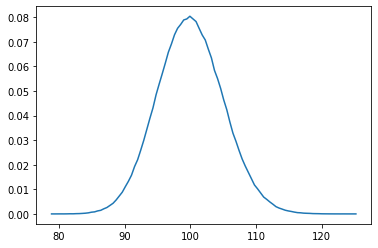

In [4]:
# Here I test out how to properly control the mean and spread of a gamma distribution

n = 1000000 # number of samples

mean = 100 # mean

stdev = 5 # desired standard deviation 

dist = gamma(mean, stdev, n)

res = drawpdf(dist,100)

print('requested mean: '+str(mean))
print('calculated mean: '+str(np.mean(dist)))
print('requested stdev: '+str(stdev))
print('calculated stdev: '+str(np.std(dist)))
print('integrate distribution: ' +str(np.sum(res[1])*(res[0][1]-res[0][0])))
plt.plot(res[0], res[1])

requested mean: 100
calculated mean: 100.00136312227282
requested stdev: 5
calculated stdev: 4.999379275462339
integrate distribution: 1.0000000000000129


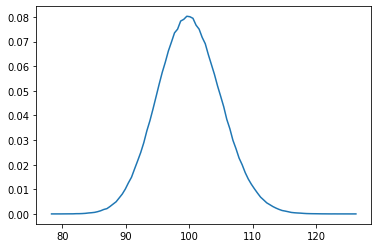

In [5]:
# Here I test out how to properly control the mean and spread of a chi squared distribution

n = 1000000 # number of samples

mean = 100 # mean

stdev = 5 # desired standard deviation

dist = chisquare(mean, stdev, n)

res = drawpdf(dist,100)

print('requested mean: '+str(mean))
print('calculated mean: '+str(np.mean(dist)))
print('requested stdev: '+str(stdev))
print('calculated stdev: '+str(np.std(dist)))
print('integrate distribution: ' +str(np.sum(res[1])*(res[0][1]-res[0][0])))
plt.plot(res[0], res[1])

## simulating a stochastic process

correlation time calculated:43.242099611333664
correlation time assigned:40.0
standard deviation calculated:10.003433931713216
standard deviation assigned:10.0
mean (should be 0):-0.06398010606754788


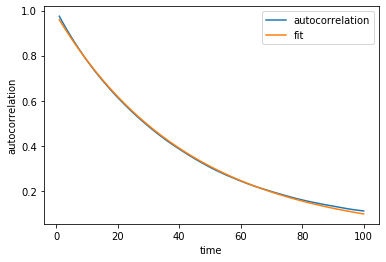

In [6]:
# check stochastic process: see if the mean, standard deviation, correlation time are correctly calculated
leng=100000
test=np.array([40., 10., 1.0])
result=stim(test[0], test[1], test[2], int(leng*test[2]) )
    # of the form stim( time constant, standard deviation, time step, length of process))
corre=autocorr(result.flatten())
x=corre[0][int(corre[1].size/2+1):][:100]
y=corre[1][int(corre[1].size/2+1):][:100]
plt.plot(x, y, label='autocorrelation')
popt, pcov = curve_fit(expfunc, x, y)
plt.plot(x, expfunc(x, popt[0], popt[1]), label='fit')
print('correlation time calculated:'+str(1/popt[0]))
print('correlation time assigned:'+str(test[0]))
print('standard deviation calculated:'+str(np.std(result))) 
print('standard deviation assigned:'+str(test[1]))
print('mean (should be 0):'+str(np.mean(result)) )
plt.xlabel('time')
plt.ylabel('autocorrelation')
plt.legend()

## fast matrix multiplication

In [9]:
custom=[]
numpy=[]
size=[]
for i in range(5):
    for j in range(5):
        X=np.random.normal(0.,1.,(i*100,j*100,100)).astype(float)
        W=np.random.normal(0.,1.,(100,100)).astype(float)
        start=time.time()
        a=blis_gemm(X, W)
        end=time.time()
  
        start1=time.time()
        b=np.dot(X,W).astype(float)
        end1=time.time()
        custom.append(end-start)
        numpy.append(end1-start1)
        size.append(a.size)
    print(i)

0
1
2
3
4


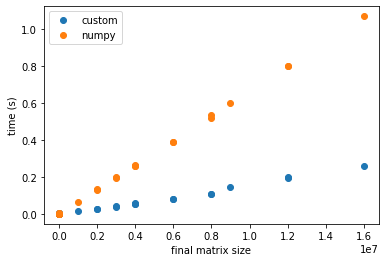

In [10]:
plt.plot(size, custom, 'o',label='custom')
plt.plot(size, numpy, 'o',label='numpy')
plt.ylabel('time (s)')
plt.xlabel('final matrix size')
plt.legend()

### histogram errors

(array([2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 7.000000e+00,
        0.000000e+00, 0.000000e+00, 4.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 5.000000e+01, 0.000000e+00,
        0.000000e+00, 4.400000e+01, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 4.820000e+02, 0.000000e+00, 1.300000e+01,
        7.540000e+02, 2.000000e+00, 7.100000e+01, 4.000000e+00,
        4.633000e+03, 2.000000e+00, 2.910000e+02, 1.500000e+01,
        9.876000e+03, 1.691000e+03, 1.160000e+02, 4.531800e+04,
        3.650000e+02, 9.892000e+03, 1.282000e+03, 1.140020e+05,
        4.370000e+03, 7.338600e+04, 4.535180e+05, 4.464500e+04,
        3.739670e+05, 1.834410e+05, 1.510894e+06, 5.495060e+05,
        1.918326e+06, 4.290158e+06, 1.111882e+06, 1.915718e+06,
        5.493880e+05, 1.509962e+06, 1.828820e+05, 3.741260e+05,
        4.442700e+04, 4.540900e+05, 7.360100e+04, 4.399000e+03,
        1.134670e+05, 1.315000e+03, 1.00

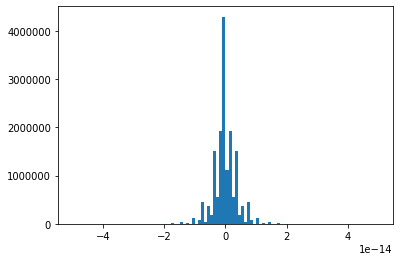

In [11]:
plt.hist((a-b).flatten(), bins=100)

## fast spin assignments

In [13]:
X=np.abs(np.random.normal(size=(200, 200, 100)))/100
start=time.time()       
a=_dice6.dice6(X)                                
end=time.time()
timetocompute1=(end-start)
print('Cython: ' + str(timetocompute1))
def spikesbetter(P):
    spikes=np.zeros(P.shape)
    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            for k in range(P.shape[2]):
                if np.random.rand() > P[i,j,k]:
                    spikes[i,j,k] += 1
    return spikes
start3=time.time()
c=spikesbetter(X)
end3=time.time()
timetocompute3=(end3-start3)
print('Numpy (better): ' + str(timetocompute3))

Cython: 1.830207109451294
Numpy (better): 5.871107578277588


(array([1.58786e+05, 1.59618e+05, 1.58107e+05, 1.57505e+05, 1.55131e+05,
        1.52923e+05, 1.51441e+05, 1.48649e+05, 1.44705e+05, 1.41989e+05,
        1.39276e+05, 1.35423e+05, 1.31422e+05, 1.27174e+05, 1.23077e+05,
        1.18162e+05, 1.13765e+05, 1.09103e+05, 1.03842e+05, 9.89890e+04,
        9.49340e+04, 8.93000e+04, 8.41490e+04, 7.99270e+04, 7.50540e+04,
        7.06500e+04, 6.64440e+04, 6.22540e+04, 5.79570e+04, 5.35980e+04,
        5.00300e+04, 4.63760e+04, 4.28190e+04, 3.92960e+04, 3.63250e+04,
        3.31350e+04, 3.03010e+04, 2.78280e+04, 2.51490e+04, 2.27320e+04,
        2.07020e+04, 1.86880e+04, 1.68050e+04, 1.52370e+04, 1.33410e+04,
        1.21730e+04, 1.05530e+04, 9.55000e+03, 8.32400e+03, 7.52700e+03,
        6.54900e+03, 5.80900e+03, 5.01500e+03, 4.46200e+03, 3.89700e+03,
        3.44100e+03, 2.94800e+03, 2.63200e+03, 2.25000e+03, 1.87200e+03,
        1.64500e+03, 1.41700e+03, 1.19700e+03, 1.06600e+03, 9.17000e+02,
        7.84000e+02, 5.89000e+02, 5.34000e+02, 4.76

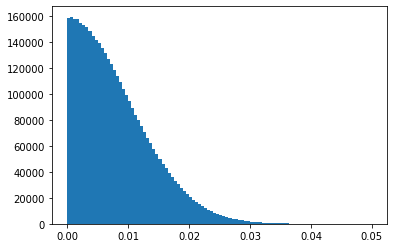

In [14]:
plt.hist(X.flatten(), bins=100)

### histogram resulting spin distributions

(array([  31704.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 3968296.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

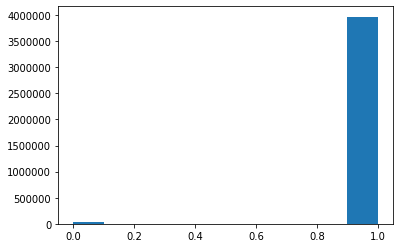

In [15]:
# Cython
plt.hist(a.flatten())

(array([  32067.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 3967933.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

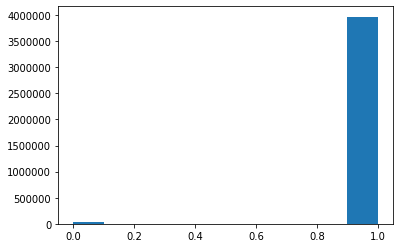

In [16]:
# Numpy (better)
plt.hist(c.flatten())